# Creación de un modelo de regresión para CreditOne

En esta tarea, se utilizarán los datos analizados de CreditOne, lo anterior a efectos de crear un algoritmo mediante el cual se implementa un modelo de regresión lineal.

## Librería Sci-kit learn

Esta librería realiza la misma función que efectuaba "Caret" en el lenguaje R, sin embargo, Sci-kit learn promete realizar con mayor agilidad los procesamientos que R.

Mediante esta librería se permite la definición del conjunto de datos de entrenamiento y prueba; siendo que para lo anterior siempre se recomienda utilizar el 75% de las observaciones para el entrenamiento, y el 25% restante para la prueba del modelo definido.

### Desarrollo del Plan de Ataque

Importación de librerías y modulos para la creación del modelo de regresión.

In [1]:
#Importación de Librerias
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Definición de los estimadores (modelos predictivos)
from sklearn.ensemble     import RandomForestRegressor #URL explicación del ensemble https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.linear_model import LinearRegression
from sklearn.svm          import SVR
from sklearn              import linear_model

#Importación de las metricas de medición
from sklearn.metrics         import mean_squared_error
from sklearn.metrics         import r2_score
from sklearn.model_selection import cross_val_score

#Validaciones cruzadas
#from sklearn.cross_validation import train_test_split (Esto esta disponible para una versión más vieja de Python)
from sklearn.model_selection import train_test_split

### Importación del Set de Datos

Una vez que se han importado los modelos necesarios para efectuar el análisis de los datos.

In [2]:
setDts = pd.read_csv('default of credit card clients.csv', header = 1)
setDts.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPayment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Una vez que se han importado los datos, se realiza una visualización general da la estructura de los mismos, lo anterior a efectos de verificar que los dominios son los correctos para el análisis a realizar.

In [3]:
setDts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                30000 non-null int64
LIMIT_BAL         30000 non-null int64
SEX               30000 non-null int64
EDUCATION         30000 non-null int64
MARRIAGE          30000 non-null int64
AGE               30000 non-null int64
PAY_0             30000 non-null int64
PAY_2             30000 non-null int64
PAY_3             30000 non-null int64
PAY_4             30000 non-null int64
PAY_5             30000 non-null int64
PAY_6             30000 non-null int64
BILL_AMT1         30000 non-null int64
BILL_AMT2         30000 non-null int64
BILL_AMT3         30000 non-null int64
BILL_AMT4         30000 non-null int64
BILL_AMT5         30000 non-null int64
BILL_AMT6         30000 non-null int64
PAY_AMT1          30000 non-null int64
PAY_AMT2          30000 non-null int64
PAY_AMT3          30000 non-null int64
PAY_AMT4          30000 non-null int64
PAY_AMT5          30000 non-null 

### Selección de datos

Para realizar la selección de los datos necesarios para el análisis se utiliza la librería "pandas", esta librería dispone de una función para seleccionar en el formato [filas, columna].

Esta función se denomina "indexing", la cual trabaja asignando un número entero para cada posición, donde a cada columna de datos se les asigna un número.

Sintaxis:
variableName = dataframe.iloc [filas, columnas]

In [4]:
caract = setDts.iloc[:, 12:23]
print ('Resumen de la muestra de caracteristicas')
caract.head()

Resumen de la muestra de caracteristicas


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [5]:
depVar = setDts['PAY_AMT6']
X_train = (caract[: 1000])
X_train.head()
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

#Testing Set (X Testing)
X_test = caract[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000
The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  
The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

### Validación Cruzada

Al igual que en R, Python dispone de metodos para verificar la validación cruzada a efectos de prevenir el sobre ajuste del modelo, según se muestra a continuacion.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape


((750, 11), (250, 11))

## Construcción de Modelos y Selección  del más apto

En este caso, los modelos se implementan mediante las librerias scikit learn, mismas que fueron importadas al inicio de este notebook.

Se va a proceder con la definición de las variables necesarias para utilizar cada modelo, en este ejemplo se utilizarán tres modelos distintos.

In [7]:
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

Definidas estas variables, se procede a definir el set de datos a utilizar para el entrenamiento de los modelos, según se muestra a continuación.

In [8]:
dfNew = setDts.iloc[:,12:23]
print('Resumen de la muestra de caracteristicas')
dfNew.head()

Resumen de la muestra de caracteristicas


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


Se realiza una verificación de la variable dependiente a utilizar en cada uno de los modelos.

In [9]:
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


Se procede a transferir los datos de entrenamiento creados previamente, a cada uno de los modelos.

In [10]:
model = LinearRegression(n_jobs=10)
model.fit(X_train, y_train)
modelRF.fit (X_train, y_train)
modelSVR.fit (X_train, y_train)
modelLR.fit (X_train, y_train)

C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Selección del modelos más adecuado

Se procede a realizar una evaluación de los rendimientos de cada uno de los modelos definidos. La métrica que usaremos para verificar el uso apropiado del modelo se llama  cross_val_score, esta función devuelve los siguientes valores:

1.er valor: la matriz de puntajes para los puntajes de las pruebas en cada división de CV. (Mayor es un indicador de un modelo con mejor rendimiento)

2do valor: El tiempo para ajustar el estimador en el conjunto de trenes para cada división de cv.

3.er valor: El tiempo para calificar el estimador en el conjunto de prueba para cada división de cv. 

In [11]:
modelRF.fit(X_train, y_train)
print (cross_val_score (modelRF, X_train, y_train)) 
modelRF.score(X_train, y_train)

C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.38803678 -0.0537087   0.04034858]


0.8448146927332463

In [12]:
modelSVR.fit(X_train, y_train)
print (cross_val_score (modelSVR, X_train, y_train)) 
modelSVR.score(X_train, y_train)

C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.07092632 -0.02715222 -0.04557148]


-0.03969578079068281

In [13]:
modelLR.fit(X_train, y_train)
print (cross_val_score (modelLR, X_train, y_train)) 
modelLR.score(X_train, y_train)

[-0.88118776  0.2076015   0.27381218]


C:\Users\jgzun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.4559741593872494

### Elaboración de las predicciones

En el test de los modelos anteriores, se logran analizar las métricas, siendo que el puntaje de la validació cruzada más alto corresponde a la regresión, por lo que se utilizará ese modelo para realiar las predicciones.

In [28]:
predict = modelRF.predict (X_test)
predRsquared = r2_score (y_test, predict) 
rmse = sqrt (mean_squared_error (y_test, predict)) 
print ('R Squared:% .3f'% predRsquared) 
print ('RMSE:% .3f' % rmse)

R Squared:-0.015
RMSE: 34163.800


### Visualización de las predicciones

Antes de realizar la visualización se verifica que el conjunto de datos de prueba y la predicción estén conformadas por la misma cantidad de observaciones.

In [30]:
y_test_count = len(y_test.index)
predict_count = len(predict)
print('The number of observations in the Y training set are:',str(y_test_count))
print('The number of observations in the predicttion set are:',str(predict_count))

The number of observations in the Y training set are: 250
The number of observations in the predicttion set are: 250


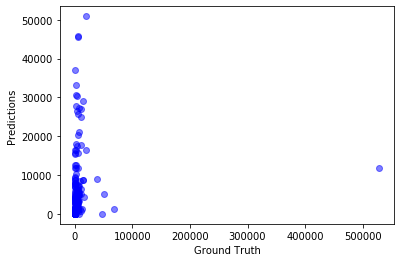

In [57]:
plt.scatter(y_test, predict, c='blue',alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();